<a href="https://colab.research.google.com/github/Farahesmail/project/blob/main/preprocessing_%26_modeling_Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA



In [74]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [75]:
data=pd.read_excel("first inten project.xlsx")

In [76]:
data.shape

(36285, 17)

In [77]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [79]:
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [80]:
data['date of reservation'] = pd.to_datetime(
    data['date of reservation'],
    errors='coerce')
data['date of reservation'] = data['date of reservation'].fillna(pd.Timestamp('2018-02-28'))



In [81]:
data['Year'] = data['date of reservation'].dt.year
data['Month'] = data['date of reservation'].dt.month
data['Month_Name'] = data['date of reservation'].dt.month_name()

In [82]:
reservations_per_month = data.groupby('Month_Name').size()
print(reservations_per_month)
reservations_per_year = data.groupby('Year').size()
print(reservations_per_year)


Month_Name
April        2737
August       3813
December     3022
February     1705
January      1014
July         2921
June         3203
March        2358
May          2599
November     2981
October      5320
September    4612
dtype: int64
Year
2015        1
2016        1
2017     6516
2018    29767
dtype: int64


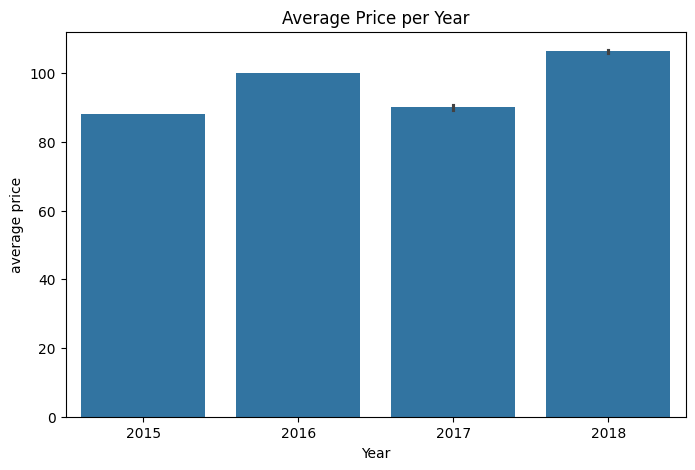

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Year', y='average price')
plt.title('Average Price per Year')
plt.show()


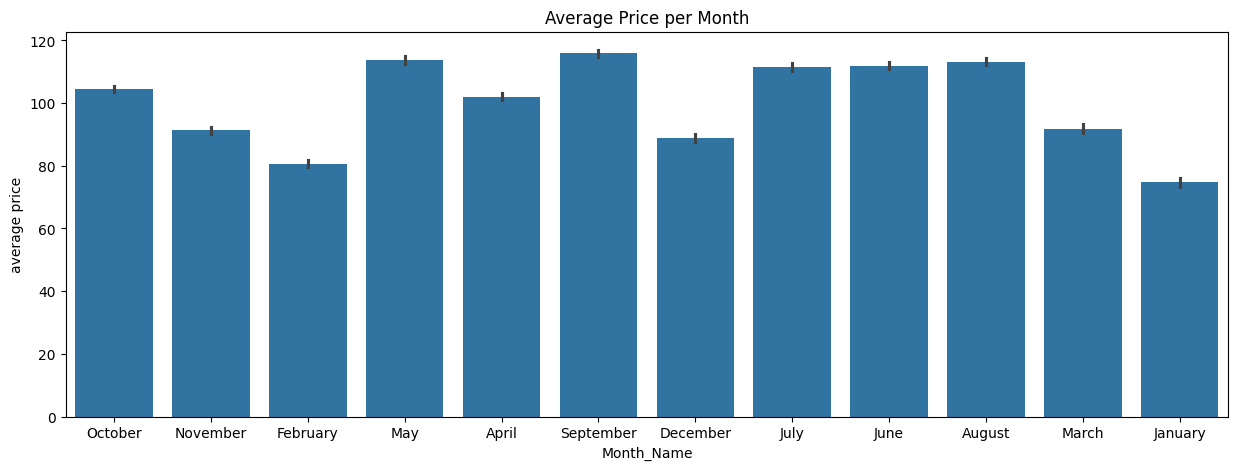

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Month_Name', y='average price')
plt.title('Average Price per Month')
plt.show()


In [85]:
year_status = pd.crosstab(data['Year'], data['booking status'])

print(year_status)

booking status  Canceled  Not_Canceled
Year                                  
2015                   0             1
2016                   1             0
2017                 962          5554
2018               10926         18841


In [86]:
month_status = pd.crosstab(data['Month_Name'], data['booking status'])

print(month_status)

booking status  Canceled  Not_Canceled
Month_Name                            
April                996          1741
August              1488          2325
December             402          2620
February             431          1274
January               24           990
July                1314          1607
June                1291          1912
March                700          1658
May                  949          1650
November             875          2106
October             1880          3440
September           1539          3073


In [87]:
data['Total_Guests'] = data['number of adults'] + data['number of children']
data['Total_Nights'] = data['number of weekend nights'] + data['number of week nights']

/tmp/ipython-input-46210868.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Total_Guests', y='special requests', ci=None,)


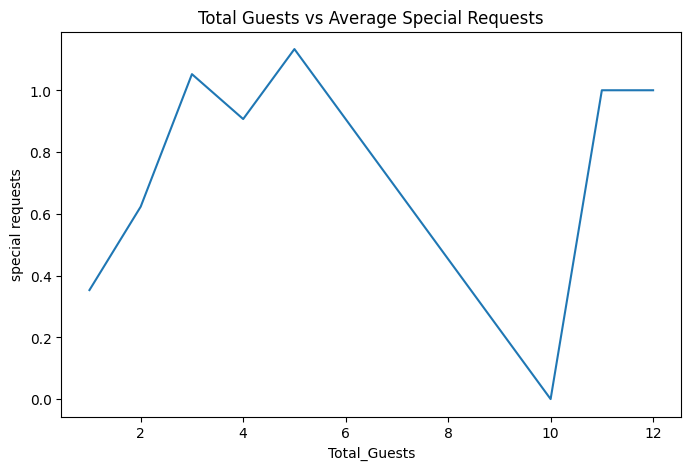

/tmp/ipython-input-46210868.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Total_Guests', y='booking status', ci=None,)


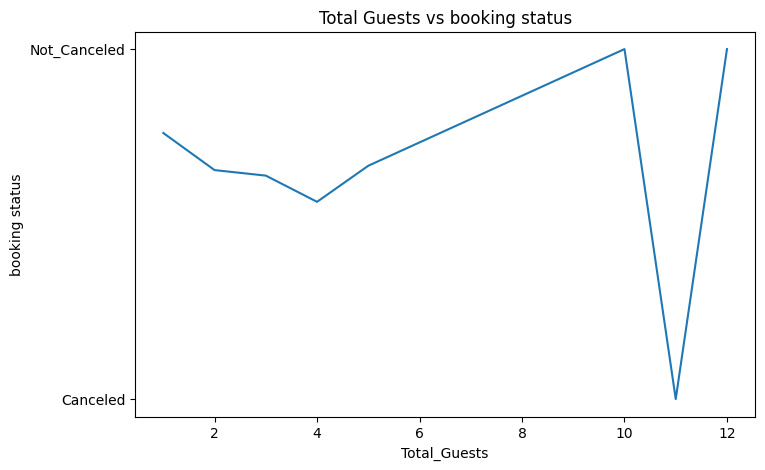

/tmp/ipython-input-46210868.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Total_Nights', y='booking status', ci=None)


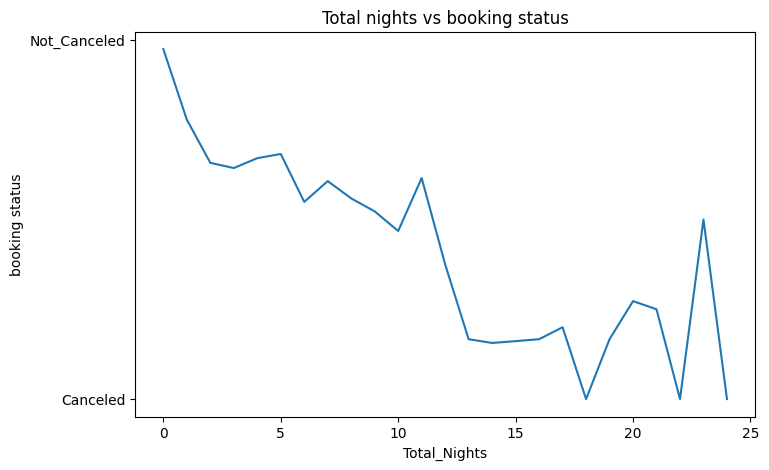

In [88]:
plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Total_Guests', y='special requests', ci=None,)
plt.title('Total Guests vs Average Special Requests')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Total_Guests', y='booking status', ci=None,)
plt.title('Total Guests vs booking status')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Total_Nights', y='booking status', ci=None)
plt.title('Total nights vs booking status')
plt.show()



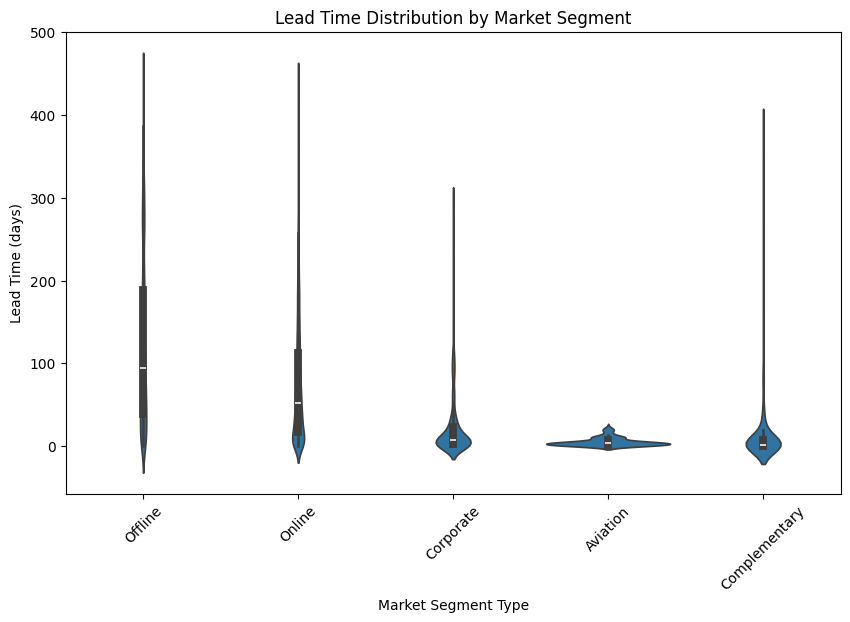

In [89]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x='market segment type', y='lead time')
plt.title('Lead Time Distribution by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=45)
plt.show()


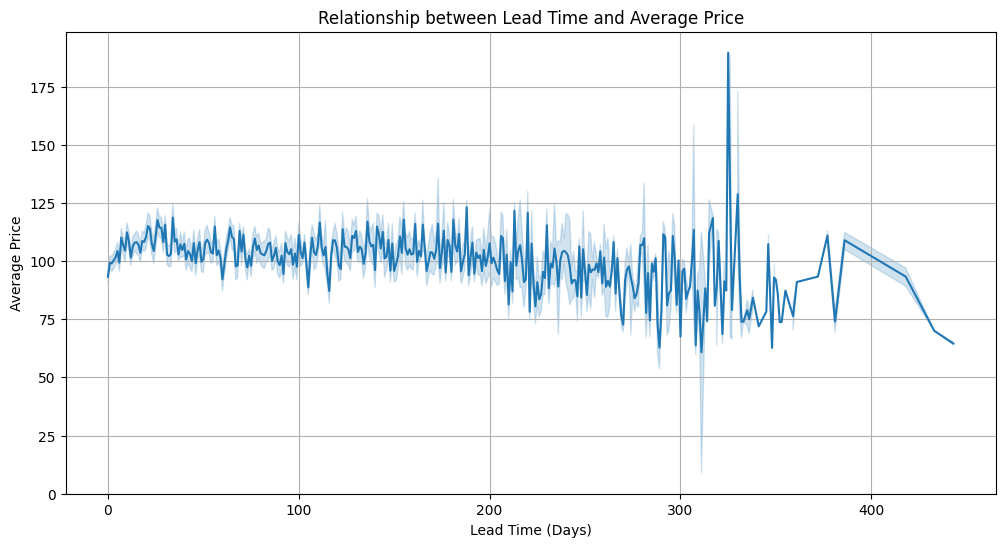

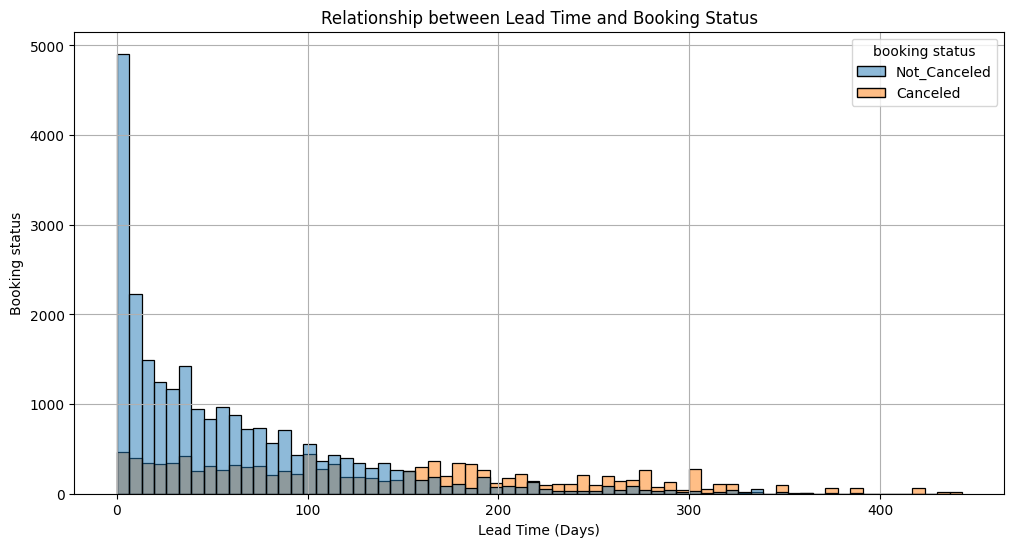

In [90]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='lead time', y='average price', data=data)

plt.title('Relationship between Lead Time and Average Price')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='lead time', hue='booking status')
plt.title('Relationship between Lead Time and Booking Status')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Booking status')
plt.grid(True)
plt.show()

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


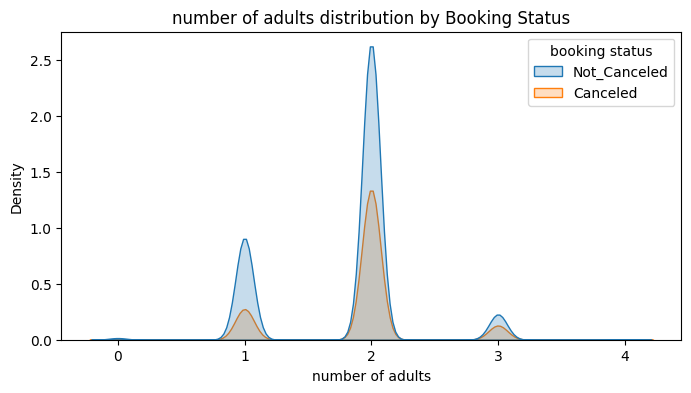

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


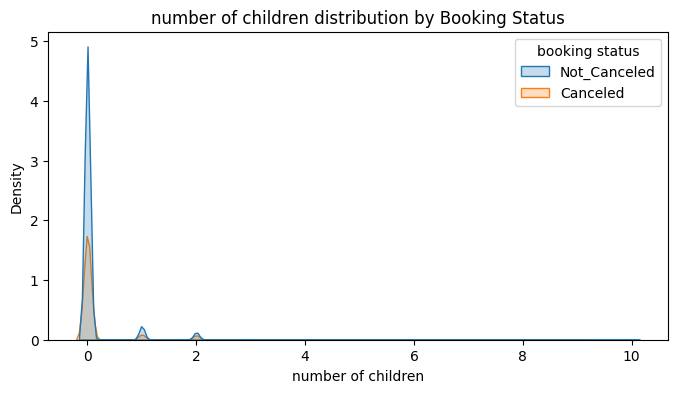

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


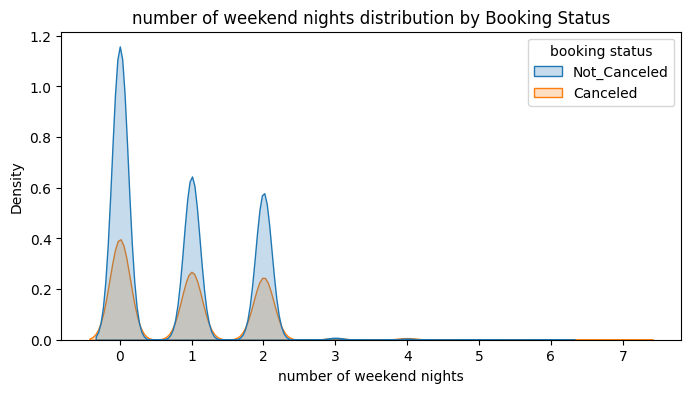

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


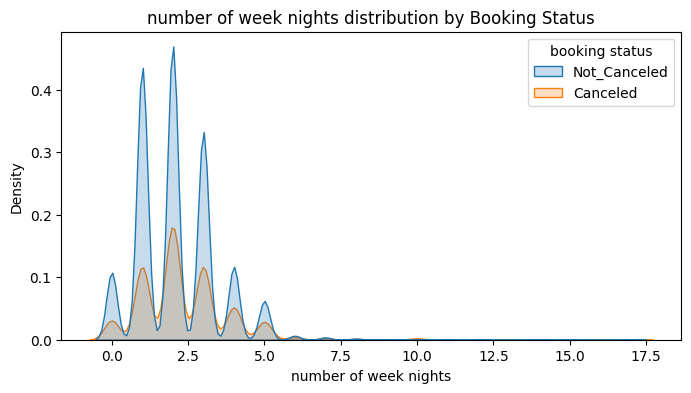

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


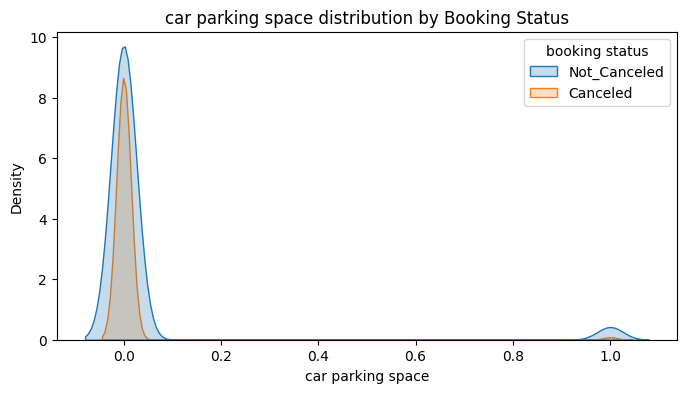

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


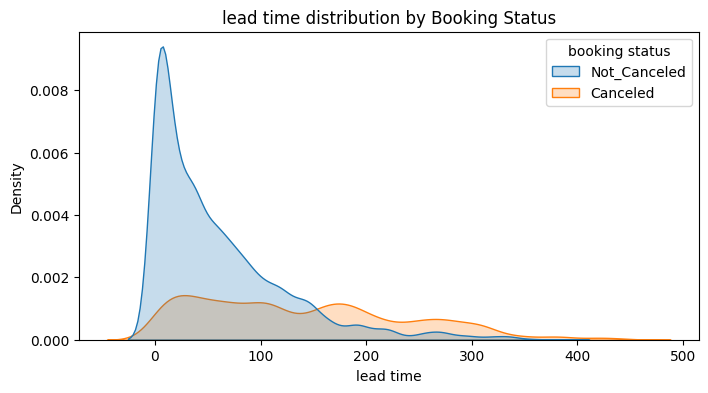

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


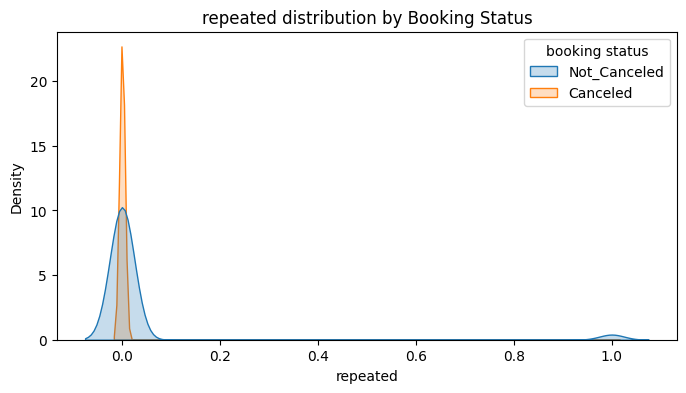

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


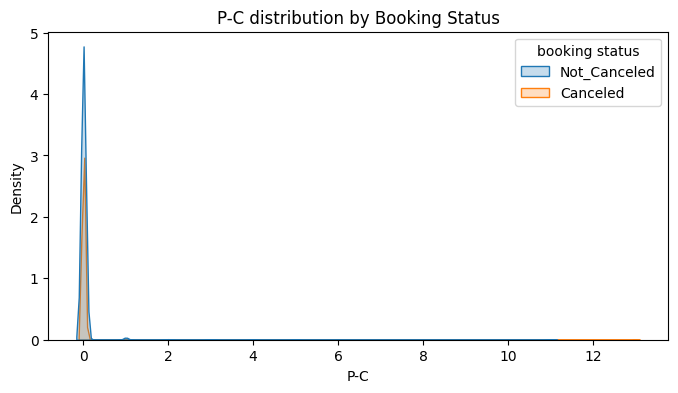

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


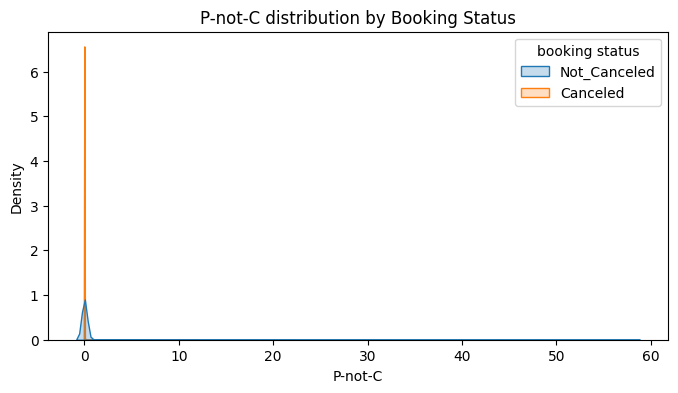

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


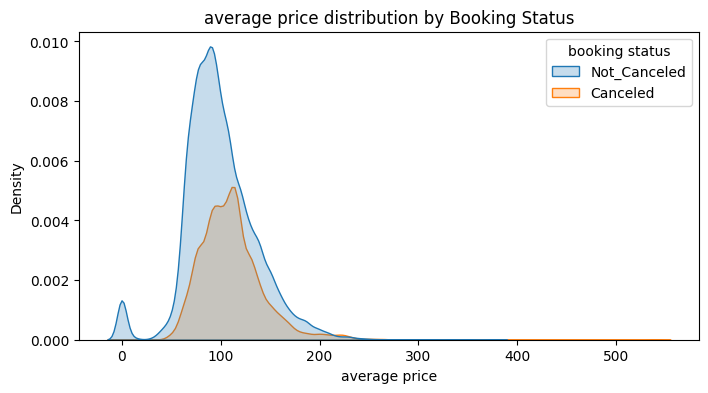

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


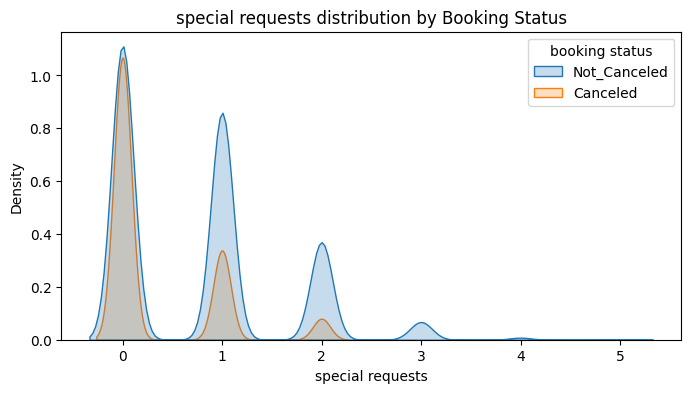

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


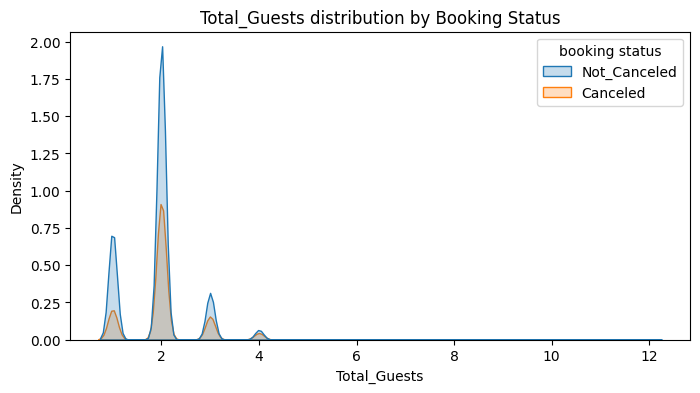

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


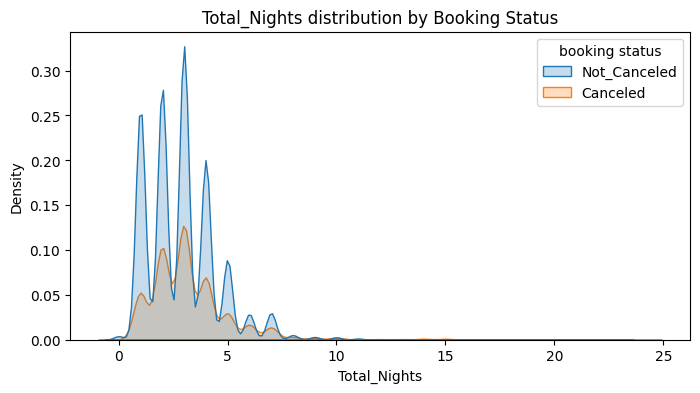

In [91]:
numeric_colss = data.select_dtypes(include=["int64","float64"]).columns
for col in numeric_colss:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=data, x=col, hue='booking status', shade=True)
    plt.title(f'{col} distribution by Booking Status')
    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


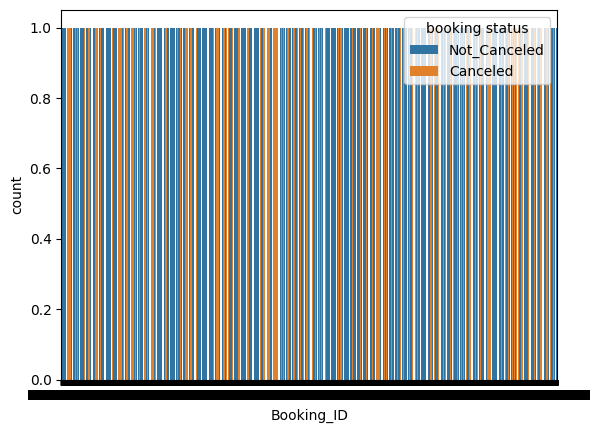

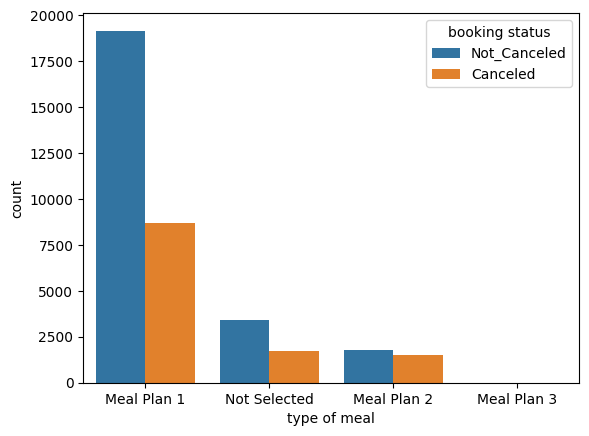

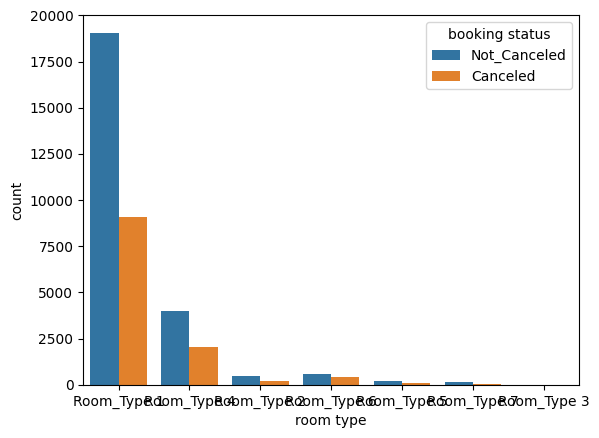

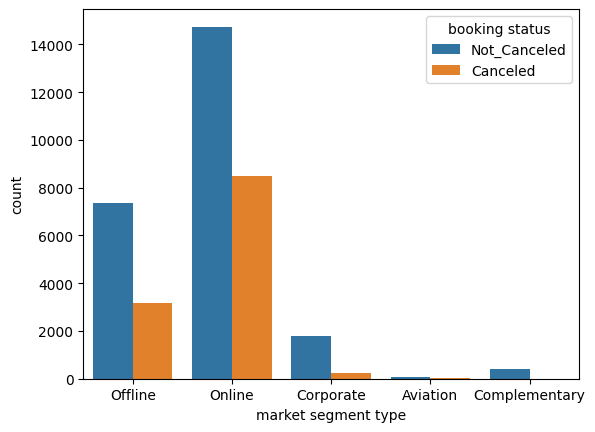

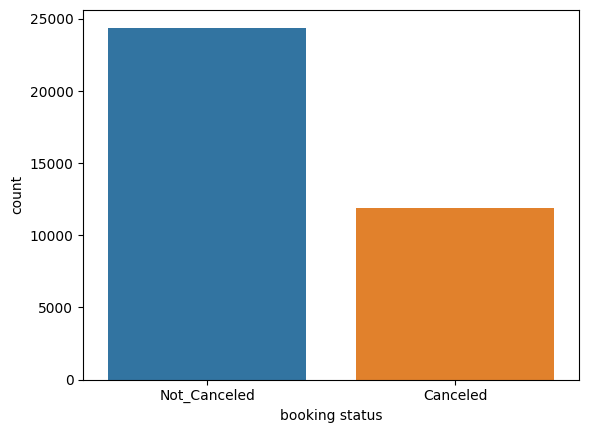

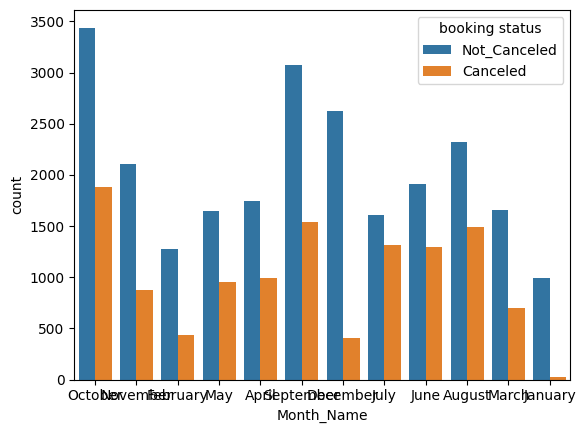

In [92]:
categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    sns.countplot(data=data,x=col,hue='booking status')
    plt.show()


# **Data Cleaning**

In [93]:
data.isnull().sum()



,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [94]:
data.duplicated().sum()

np.int64(0)

In [95]:
#check for unlogical data
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation,Year,Month,Total_Guests,Total_Nights
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,2018-05-24 13:22:45.886730240,2017.820284,7.423811,1.950200,3.015296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00,2015.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00,2018.000000,5.000000,2.000000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00,2018.000000,8.000000,2.000000,3.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00,2018.000000,10.000000,2.000000,4.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00,2018.000000,12.000000,12.000000,24.000000
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,NaN,0.384243,3.069935,0.650361,1.786000


In [96]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

encoded_columns=["booking status","type of meal","market segment type","room type",'Month_Name']

for col in encoded_columns:
    data[col]=le.fit_transform(data[col])

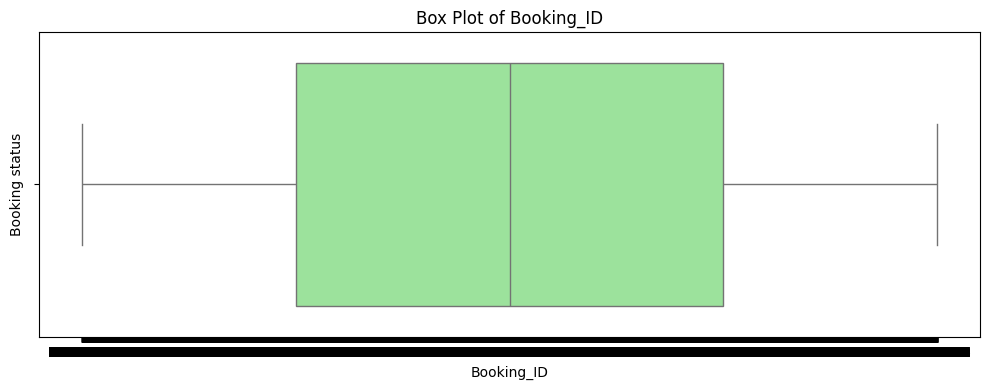

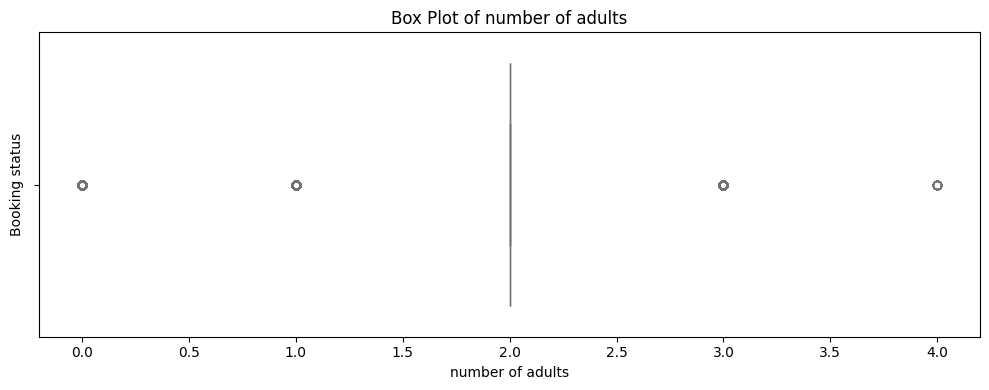

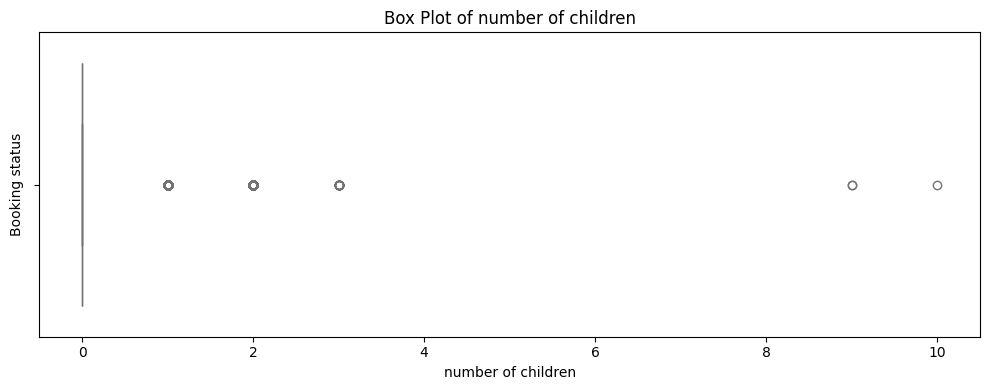

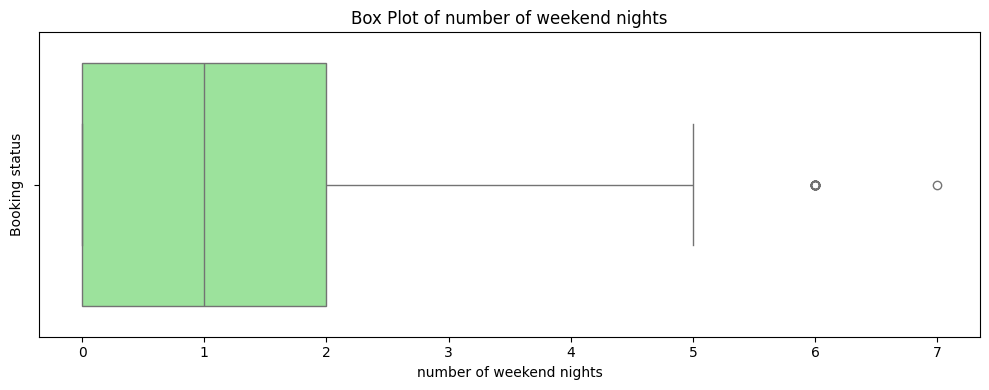

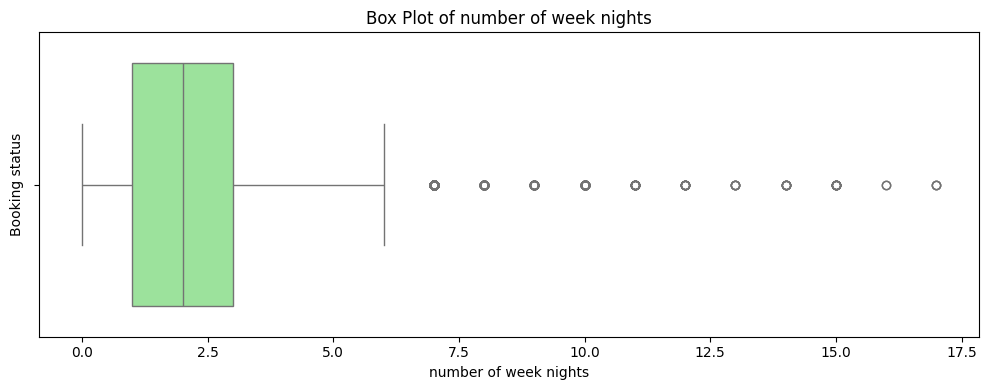

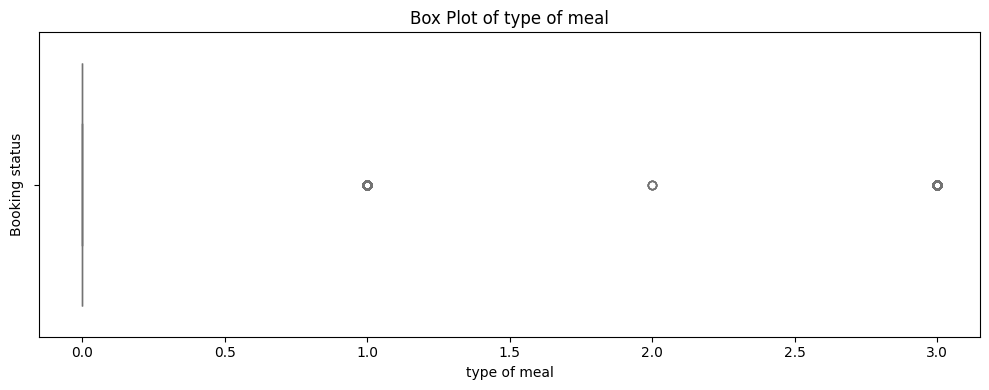

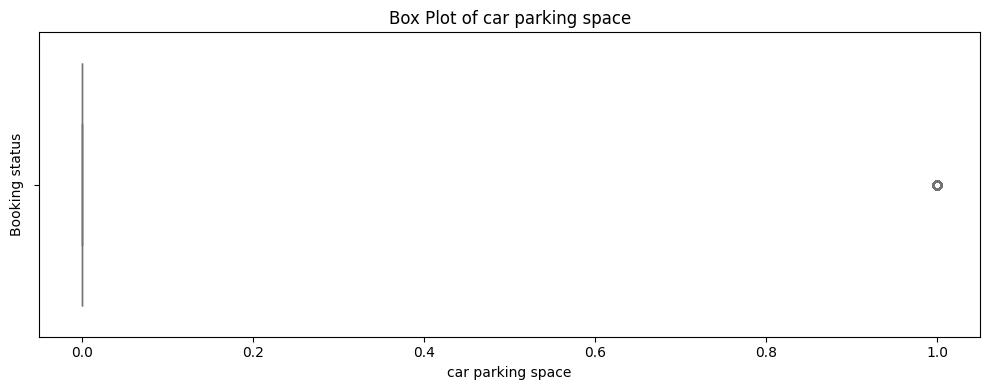

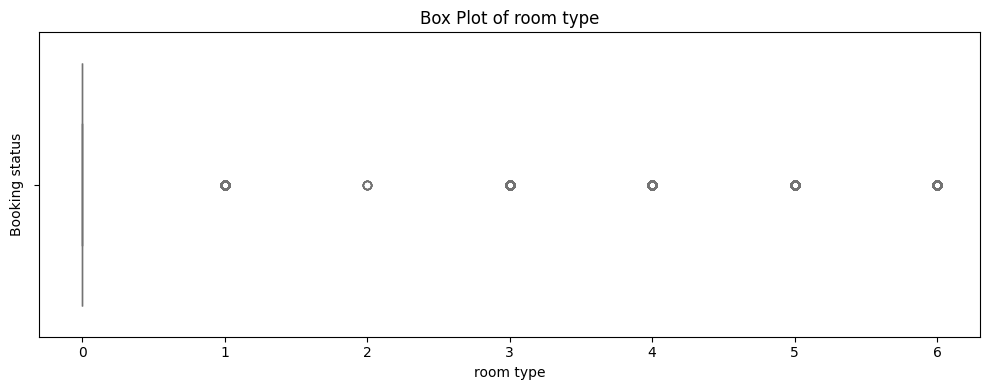

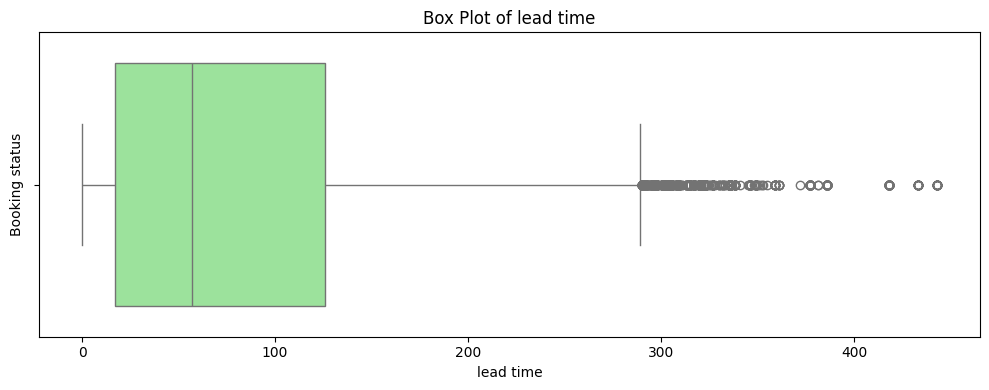

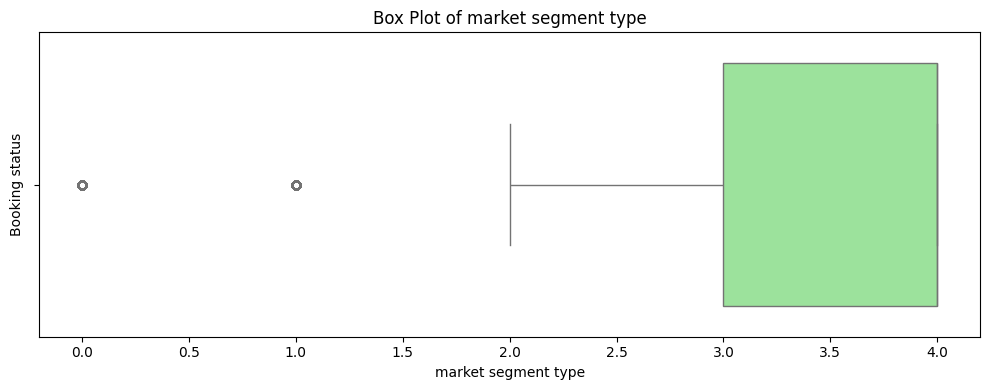

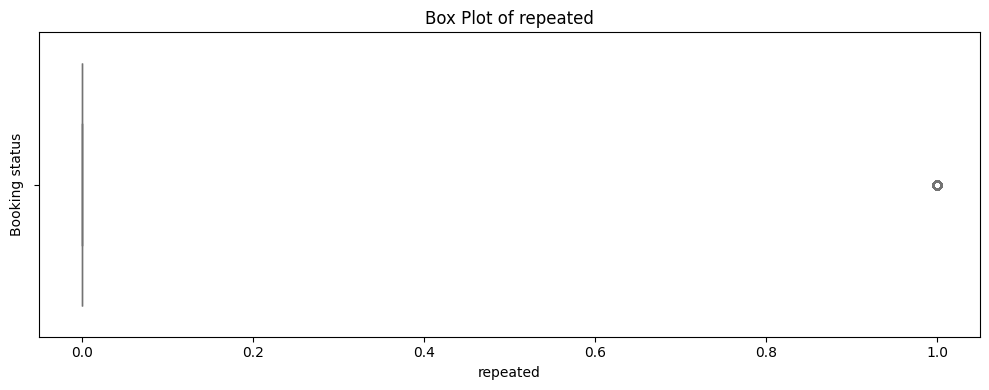

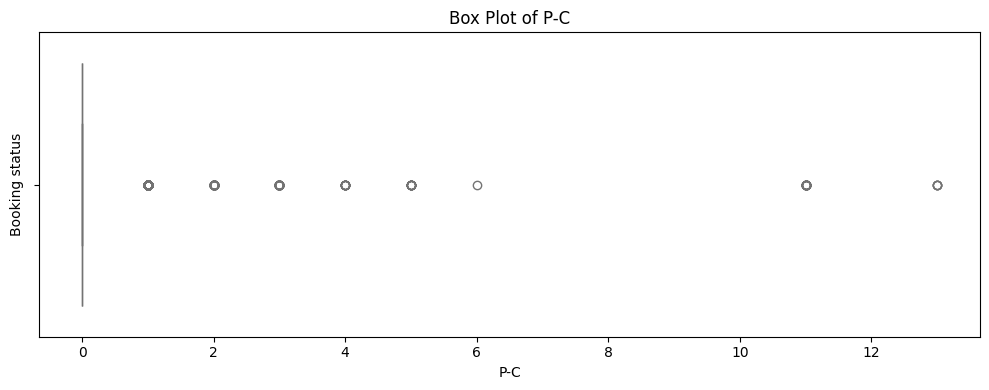

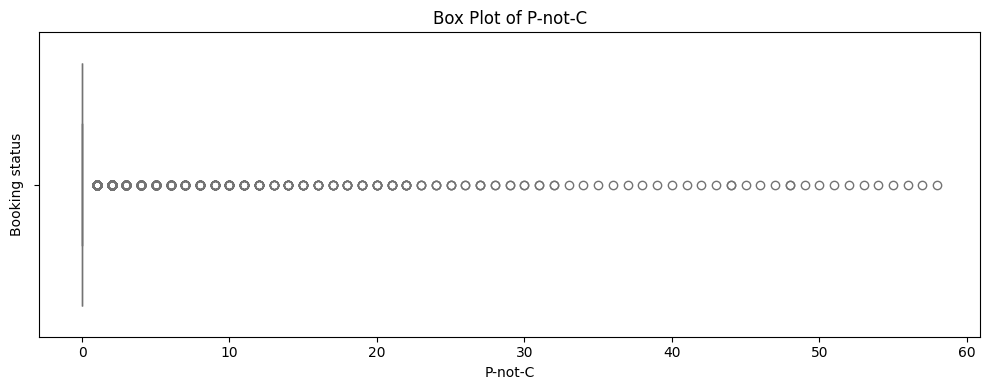

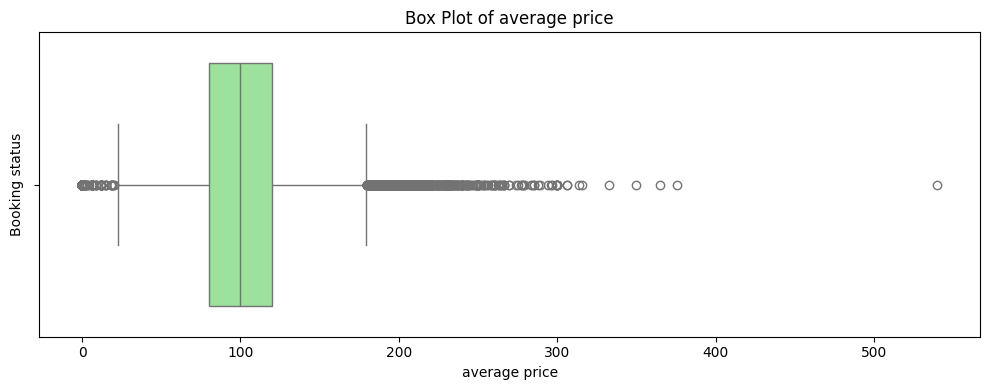

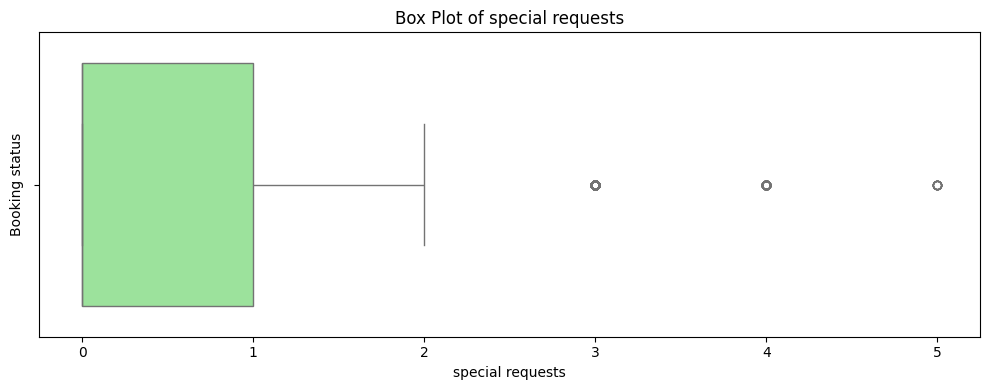

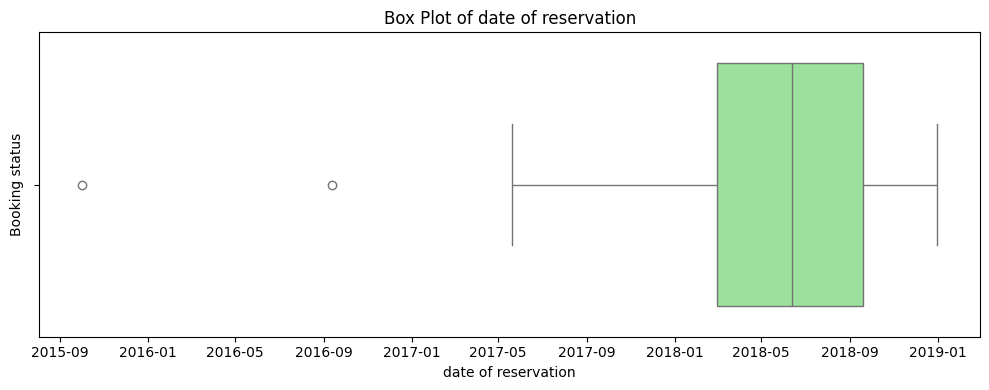

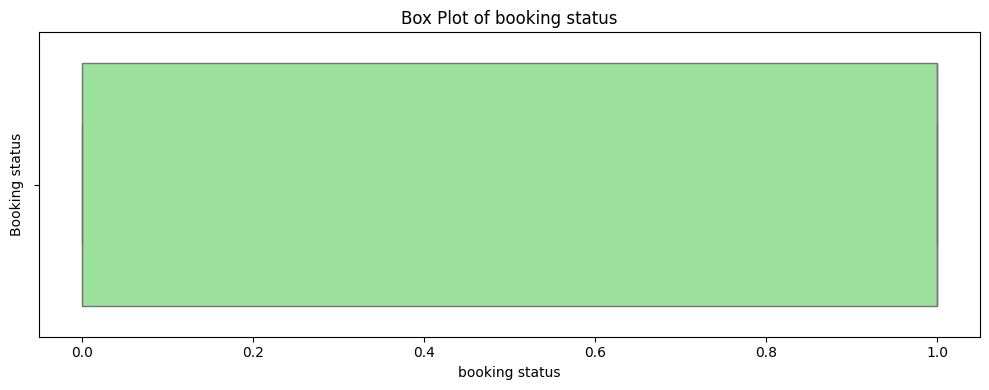

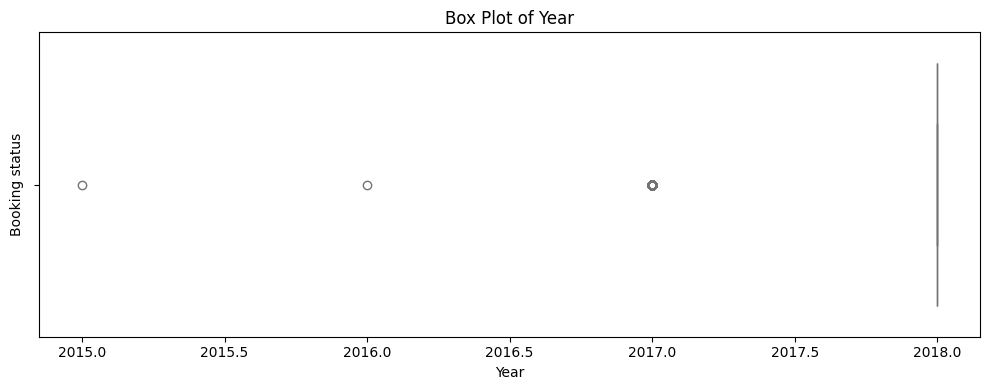

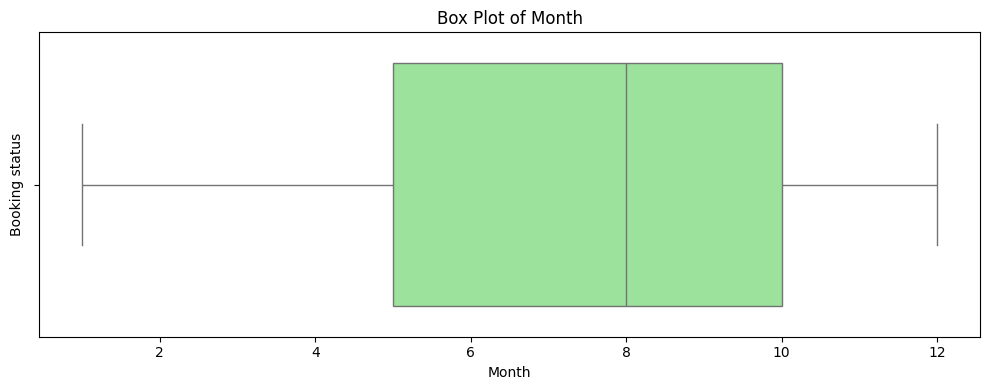

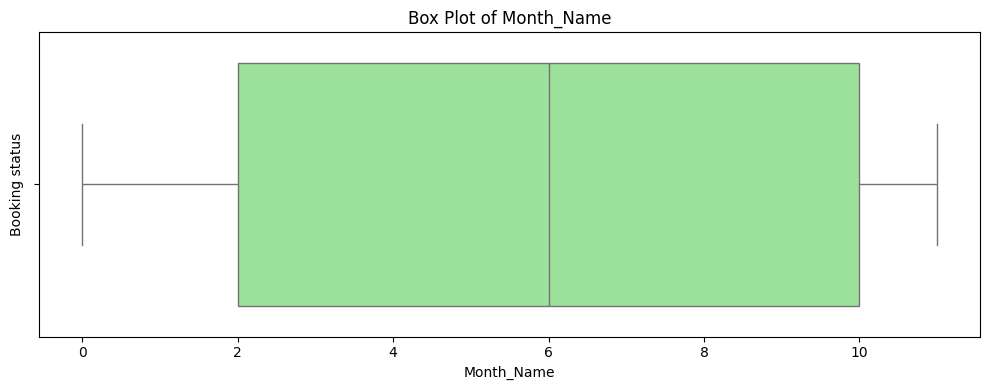

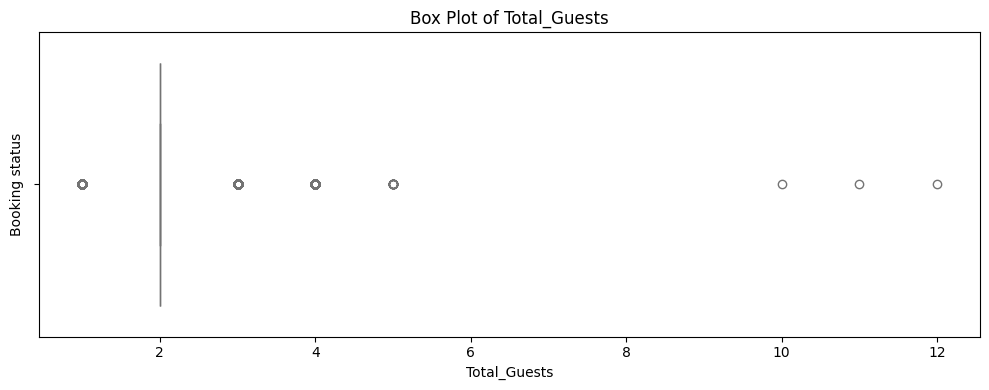

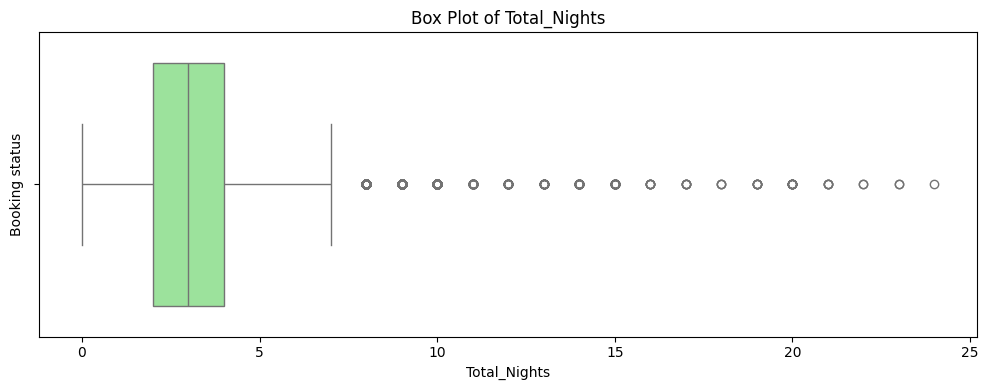

In [97]:
for col in data.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.ylabel("Booking status")
    plt.tight_layout()
    plt.show()

In [98]:
# Capping lead_time at the 95th percentile
upper_limit = data['lead time'].quantile(0.95)
data['lead time'] = data['lead time'].clip(upper=upper_limit)


upper_limit = data['average price'].quantile(0.95)
data['average price'] = data['average price'].clip(upper=upper_limit)

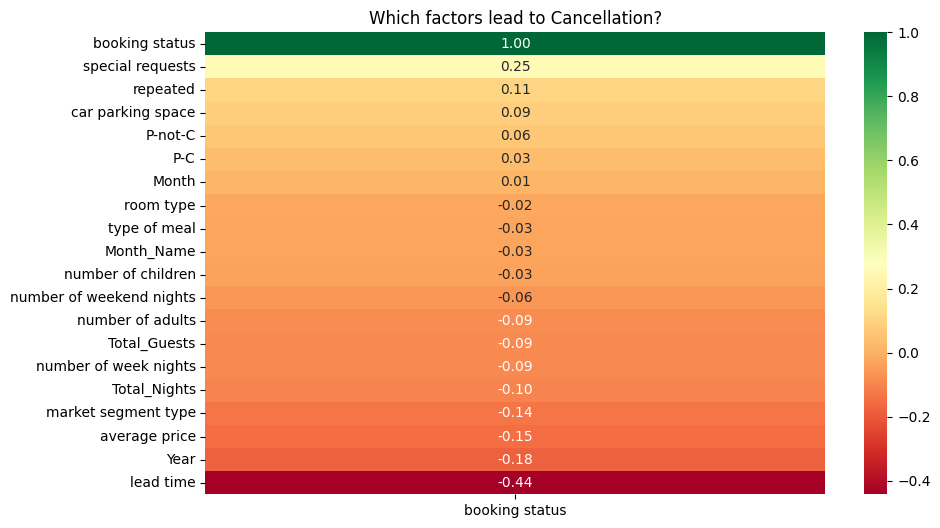

In [99]:
import numpy as np
# حساب الارتباط للأعمدة الرقمية
plt.figure(figsize=(10, 6))
correlation = data.select_dtypes(include=[np.number]).corr()

sns.heatmap(correlation[['booking status']].sort_values(by='booking status', ascending=False),
            annot=True, cmap='RdYlGn', fmt=".2f")

plt.title('Which factors lead to Cancellation?')
plt.show()

In [100]:
data.shape

(36285, 22)

In [101]:
data = data.drop(columns=[
    'number of children',
    'type of meal',
    'room type',
    'Month',
    'P-C',
    'Booking_ID',
    'date of reservation'
])

In [102]:
data.shape

(36285, 15)

In [103]:
data.head()

,number of adults,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-not-C,average price,special requests,booking status,Year,Month_Name,Total_Guests,Total_Nights
0,1,2,5,0,224,3,0,0,88.00,0,1,2015,10,2,7
1,1,1,3,0,5,4,0,0,106.68,1,1,2018,9,1,4
2,2,1,3,0,1,4,0,0,50.00,0,0,2018,3,3,4
3,1,0,2,0,211,4,0,0,100.00,1,0,2017,8,1,2
4,1,1,2,0,48,4,0,0,77.00,0,0,2018,0,1,3


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Ensure 'data' is a DataFrame when splitting X and y
# If data was converted to numpy array in previous step, we need to restart from the cell where data is loaded
# Assuming data is still a DataFrame before this cell, or reloading it if necessary.

# Separate features (X) and target (y)
X = data.drop(columns=["booking status"])
y = data["booking status"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply scaler only to the feature sets (X_train, X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Modeling**

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#1 means non-cancellation ##0 cancelled
##the accuracy is constant whatever K

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.6689814814814815

Confusion Matrix:
 [[   0 3003]
 [   0 6069]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3003
           1       0.67      1.00      0.80      6069

    accuracy                           0.67      9072
   macro avg       0.33      0.50      0.40      9072
weighted avg       0.45      0.67      0.54      9072



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [120]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt_model.fit(X_train_scaled, y_train)


y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.861221340388007

Confusion Matrix:
 [[2375  628]
 [ 631 5438]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      3003
           1       0.90      0.90      0.90      6069

    accuracy                           0.86      9072
   macro avg       0.84      0.84      0.84      9072
weighted avg       0.86      0.86      0.86      9072



In [121]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8949514991181657

Confusion Matrix:
 [[2395  608]
 [ 345 5724]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      3003
           1       0.90      0.94      0.92      6069

    accuracy                           0.89      9072
   macro avg       0.89      0.87      0.88      9072
weighted avg       0.89      0.89      0.89      9072

